# LOGISTIC REGRESSION
## **Nama:** AHMAD HAMDANI
## **NIM:** 233307092

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [5]:
data = 'data/weather_aus.csv'
df = pd.read_csv(data)

In [6]:
df.shape

(145460, 23)

In [7]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [8]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**1. Apa saja variabel kategorikal yang ada?**, dengan melakukan perulangan dengan `for` dan memilih colomns dengan data tipe `object`. Setelah melakukan pengelompokan tipe data pada kolom dan menyimpannya pada variabel `kategorikal`. Tampilkan jumlah kolom dengan tipe data `kategorikal`, kolom/variabel yang memiliki tipe data `kategorikal`, dan menampilkan 5 baris pertama dari kolom `kategorikal`.

In [10]:
categorical = [var for var in df.columns if df[var].dtype == 'O']

print('Ada {} variabel kategori\n'.format(len(categorical)))
print('Variabel kategorisnya adalah:', categorical)

Ada 7 variabel kategori

Variabel kategorisnya adalah: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [11]:
df[categorical].head()

Date Location WindGustDir WindDir9am WindDir3pm RainToday  \
0  2008-12-01   Albury           W          W        WNW        No   
1  2008-12-02   Albury         WNW        NNW        WSW        No   
2  2008-12-03   Albury         WSW          W        WSW        No   
3  2008-12-04   Albury          NE         SE          E        No   
4  2008-12-05   Albury           W        ENE         NW        No   

  RainTomorrow  
0           No  
1           No  
2           No  
3           No  
4           No

**2. Apa saja variabel numerical yang ada?**, dengan melakukan perulangan dengan `for` dan memilih colomns dengan data tipe `int64` dan `float64`. Setelah melakukan pengelompokan tipe data pada kolom dan menyimpannya pada variabel `numerical`. Tampilkan jumlah kolom dengan tipe data `numerical`, kolom/variabel yang memiliki tipe data `numerical`, dan menampilkan 5 baris pertama dari kolom `numerical`.

In [12]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('Ada {} variabel numerik\n'.format(len(numerical)))

print('Variabel numeriknya adalah:', numerical)

Ada 16 variabel numerik

Variabel numeriknya adalah: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [13]:
df[numerical].head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          NaN       NaN           44.0   
1      7.4     25.1       0.0          NaN       NaN           44.0   
2     12.9     25.7       0.0          NaN       NaN           46.0   
3      9.2     28.0       0.0          NaN       NaN           24.0   
4     17.5     32.3       1.0          NaN       NaN           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0       1007.1       8.0       NaN     16.9     21.8  
1       1007.8       NaN       NaN     17.2     24.3  
2       1008.7       NaN       2.0     21.0     23.2  
3       1012.8       NaN       NaN     18.1     26.5  
4       1006.0       7.0       8.0     17.8     29.7

**3. Selain variabel Date, variabel apa yang memiliki varian (label) terbanyak?**, Menampilkan labels yang memilki labels terbanyak selain variabel `Date`, dan hasilnya yaitu Variabel `Location` yang berisi 49 label.

In [14]:
for var in categorical:    
    print(var, ' berisi ', len(df[var].unique()), ' labels')

Date  berisi  3436  labels
Location  berisi  49  labels
WindGustDir  berisi  17  labels
WindDir9am  berisi  17  labels
WindDir3pm  berisi  17  labels
RainToday  berisi  3  labels
RainTomorrow  berisi  3  labels


**4. Sebutkan variabel-variabel apa saja yang memiliki nilai kosong (missing value)**, 
- Penggunaan fungsi `.info()`, menampilkan informasi dari dataset yang juga terdapat informasi mengenai kolom apa saja yang ada, tipe data pada setiap kolom, dan informasi kolom yang memiliki nilai kosong atau tidak genap dari total jumlah baris data.
- Penggunaan fungsi `.isnull().sum()`, yang menampilkan informasi total data kosong pada setiiap kolom di dataset.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [16]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

**5. Variabel apa yang memiliki missing values terbanyak?**, menampilkan informasi variabel yang memiliki nilai kosong terbanyak `(Sunshine)`, beserta total dari data yang hilang `(69835)`.

In [17]:
missing_counts = df.isnull().sum()

max_missing_var = missing_counts.idxmax()
max_missing_count = missing_counts.max()

print(f"Variabel dengan missing values terbanyak adalah '{max_missing_var}' dengan {max_missing_count} nilai yang hilang.")

Variabel dengan missing values terbanyak adalah 'Sunshine' dengan 69835 nilai yang hilang.


**6. Metode apa yang digunakan sebagai imputasi nilai pada missing values pada kategori numerikal dan kategorikal? Jelaskan alasannya.**, 
- Pada kolom yang memiliki data numerik yang memiliki nilai kosong, lakukan pengisian data dengan `.fillna()` dan isi dengan nilai `rata-rata` dari kolom tersebut.
- Pada kolom yang memiliki data kategorikal yang memiliki nilai kosong, lakukan pengisian data dengan `.fillna()` dan isi dengan nilai yang sering muncul dari kolom tersebut.

    Setelah melakukan pengisian data yang kosong, selanjutnya tampilkan data yang kosong tersebut dengan perintah .head() untuk menampilkan 5 data pertama dan .isnull().sum() untuk menampilkan apakah ada data yang masih memiliki nilai yang kosong.

In [18]:
for var in numerical:
    if df[var].isnull().sum() > 0:
        df[var].fillna(df[var].median(), inplace=True)


C:\Users\ACER\AppData\Local\Temp\ipykernel_15952\4235692276.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[var].fillna(df[var].median(), inplace=True)


In [19]:
df[numerical].head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          4.8       8.4           44.0   
1      7.4     25.1       0.0          4.8       8.4           44.0   
2     12.9     25.7       0.0          4.8       8.4           46.0   
3      9.2     28.0       0.0          4.8       8.4           24.0   
4     17.5     32.3       1.0          4.8       8.4           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0       1007.1       8.0       5.0     16.9     21.8  
1       1007.8       5.0       5.0     17.2     24.3  
2       1008.7       5.0       2.0     21.0     23.2  
3       1012.8       5.0       5.0     18.1     26.5  
4       1006.0       7.0       8.0     17.8     29.7

In [20]:
df[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [21]:
for var in categorical:
    if df[var].isnull().sum() > 0:
        df[var].fillna(df[var].mode()[0], inplace=True)


C:\Users\ACER\AppData\Local\Temp\ipykernel_15952\584510310.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[var].fillna(df[var].mode()[0], inplace=True)


In [22]:
df[categorical].head()

Date Location WindGustDir WindDir9am WindDir3pm RainToday  \
0  2008-12-01   Albury           W          W        WNW        No   
1  2008-12-02   Albury         WNW        NNW        WSW        No   
2  2008-12-03   Albury         WSW          W        WSW        No   
3  2008-12-04   Albury          NE         SE          E        No   
4  2008-12-05   Albury           W        ENE         NW        No   

  RainTomorrow  
0           No  
1           No  
2           No  
3           No  
4           No

In [23]:
df[categorical].isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

**7. Tambahkan beberapa chart untuk memvisualisasikan sebaran data dan hubungan antar variabel dalam dataset.**, 
- Buat variabel `df_numerical` yang menyimpan `10000` data dengan kolom numerik
- Buat variabel `df_kategori` yang menyimpan `10000` data dengan kolom kategori

In [42]:
df_numerical = df[numerical].head(10000)
df_numerical

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0        13.4     22.9       0.6          4.8       8.4           44.0   
1         7.4     25.1       0.0          4.8       8.4           44.0   
2        12.9     25.7       0.0          4.8       8.4           46.0   
3         9.2     28.0       0.0          4.8       8.4           24.0   
4        17.5     32.3       1.0          4.8       8.4           41.0   
...       ...      ...       ...          ...       ...            ...   
9995      9.2     21.7       0.0          3.0      10.8           17.0   
9996     12.0     17.4       0.2          3.4       0.7           30.0   
9997     12.2     20.9      25.0          0.6      10.7           35.0   
9998     11.1     22.7       0.0          2.4       9.6           43.0   
9999     11.7     20.7       4.0          2.2       0.2           56.0   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0             20.0          24.0         71.0         22.0       1007.7   
1              4.0          22.0         44.0         25.0       1010.6   
2             19.0          26.0         38.0         30.0       1007.6   
3             11.0           9.0         45.0         16.0       1017.6   
4              7.0          20.0         82.0         33.0       1010.8   
...            ...           ...          ...          ...          ...   
9995           4.0          11.0         71.0         51.0       1025.4   
9996          13.0          20.0         83.0         96.0       1022.6   
9997          17.0          15.0         70.0         62.0       1019.7   
9998           6.0           9.0         54.0         79.0       1018.6   
9999           7.0          11.0         77.0         77.0       1021.0   

      Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0          1007.1       8.0       5.0     16.9     21.8  
1          1007.8       5.0       5.0     17.2     24.3  
2          1008.7       5.0       2.0     21.0     23.2  
3          1012.8       5.0       5.0     18.1     26.5  
4          1006.0       7.0       8.0     17.8     29.7  
...           ...       ...       ...      ...      ...  
9995       1022.6       0.0       0.0     18.2     20.9  
9996       1018.2       8.0       8.0     17.1     15.6  
9997       1017.2       1.0       1.0     17.3     20.0  
9998       1016.0       5.0       7.0     19.8     20.3  
9999       1017.7       4.0       7.0     17.3     19.4  

[10000 rows x 16 columns]

In [43]:
df_kategori = df[categorical].head(10000)
df_kategori

Date      Location WindGustDir WindDir9am WindDir3pm RainToday  \
0     2008-12-01        Albury           W          W        WNW        No   
1     2008-12-02        Albury         WNW        NNW        WSW        No   
2     2008-12-03        Albury         WSW          W        WSW        No   
3     2008-12-04        Albury          NE         SE          E        No   
4     2008-12-05        Albury           W        ENE         NW        No   
...          ...           ...         ...        ...        ...       ...   
9995  2011-08-26  CoffsHarbour           E        NNE        ENE        No   
9996  2011-08-27  CoffsHarbour         ENE         NE         NE        No   
9997  2011-08-28  CoffsHarbour         SSW         SW        SSE       Yes   
9998  2011-08-29  CoffsHarbour          SW         SE        NNE        No   
9999  2011-08-30  CoffsHarbour           S         NW        WSW       Yes   

     RainTomorrow  
0              No  
1              No  
2              No  
3              No  
4              No  
...           ...  
9995           No  
9996          Yes  
9997           No  
9998          Yes  
9999          Yes  

[10000 rows x 7 columns]

**7.1. Menampilkan atau visualisasi data numerikal**
- Menampilkan data dengan `pairplot`, untuk memvisualisasikan hubungan antara 16 variabel numerik dalam dataset, memungkinkan analisis korelasi dan distribusi guna mengidentifikasi pola serta wawasan yang mungkin tersembunyi dalam data.
- Menampilkan data dengan `histogram`, untuk 10.000 data pertama dari `df_numerical`, membantu memahami distribusi masing-masing variabel terkait cuaca dengan visualisasi frekuensi nilai dalam 30 bins per histogram.
- Menampilkan data dengan `boxplot` untuk setiap variabel numerik dalam 10.000 data pertama, memberikan visualisasi distribusi, persebaran, serta mendeteksi keberadaan `outlier` guna analisis lebih dalam terhadap data cuaca.
- Menampilkan data dengan `heatmap` korelasi antara variabel numerik dalam 10.000 data pertama, memvisualisasikan hubungan antar fitur dengan warna yang mencerminkan kekuatan dan arah korelasi, membantu analisis pola dalam data cuaca.

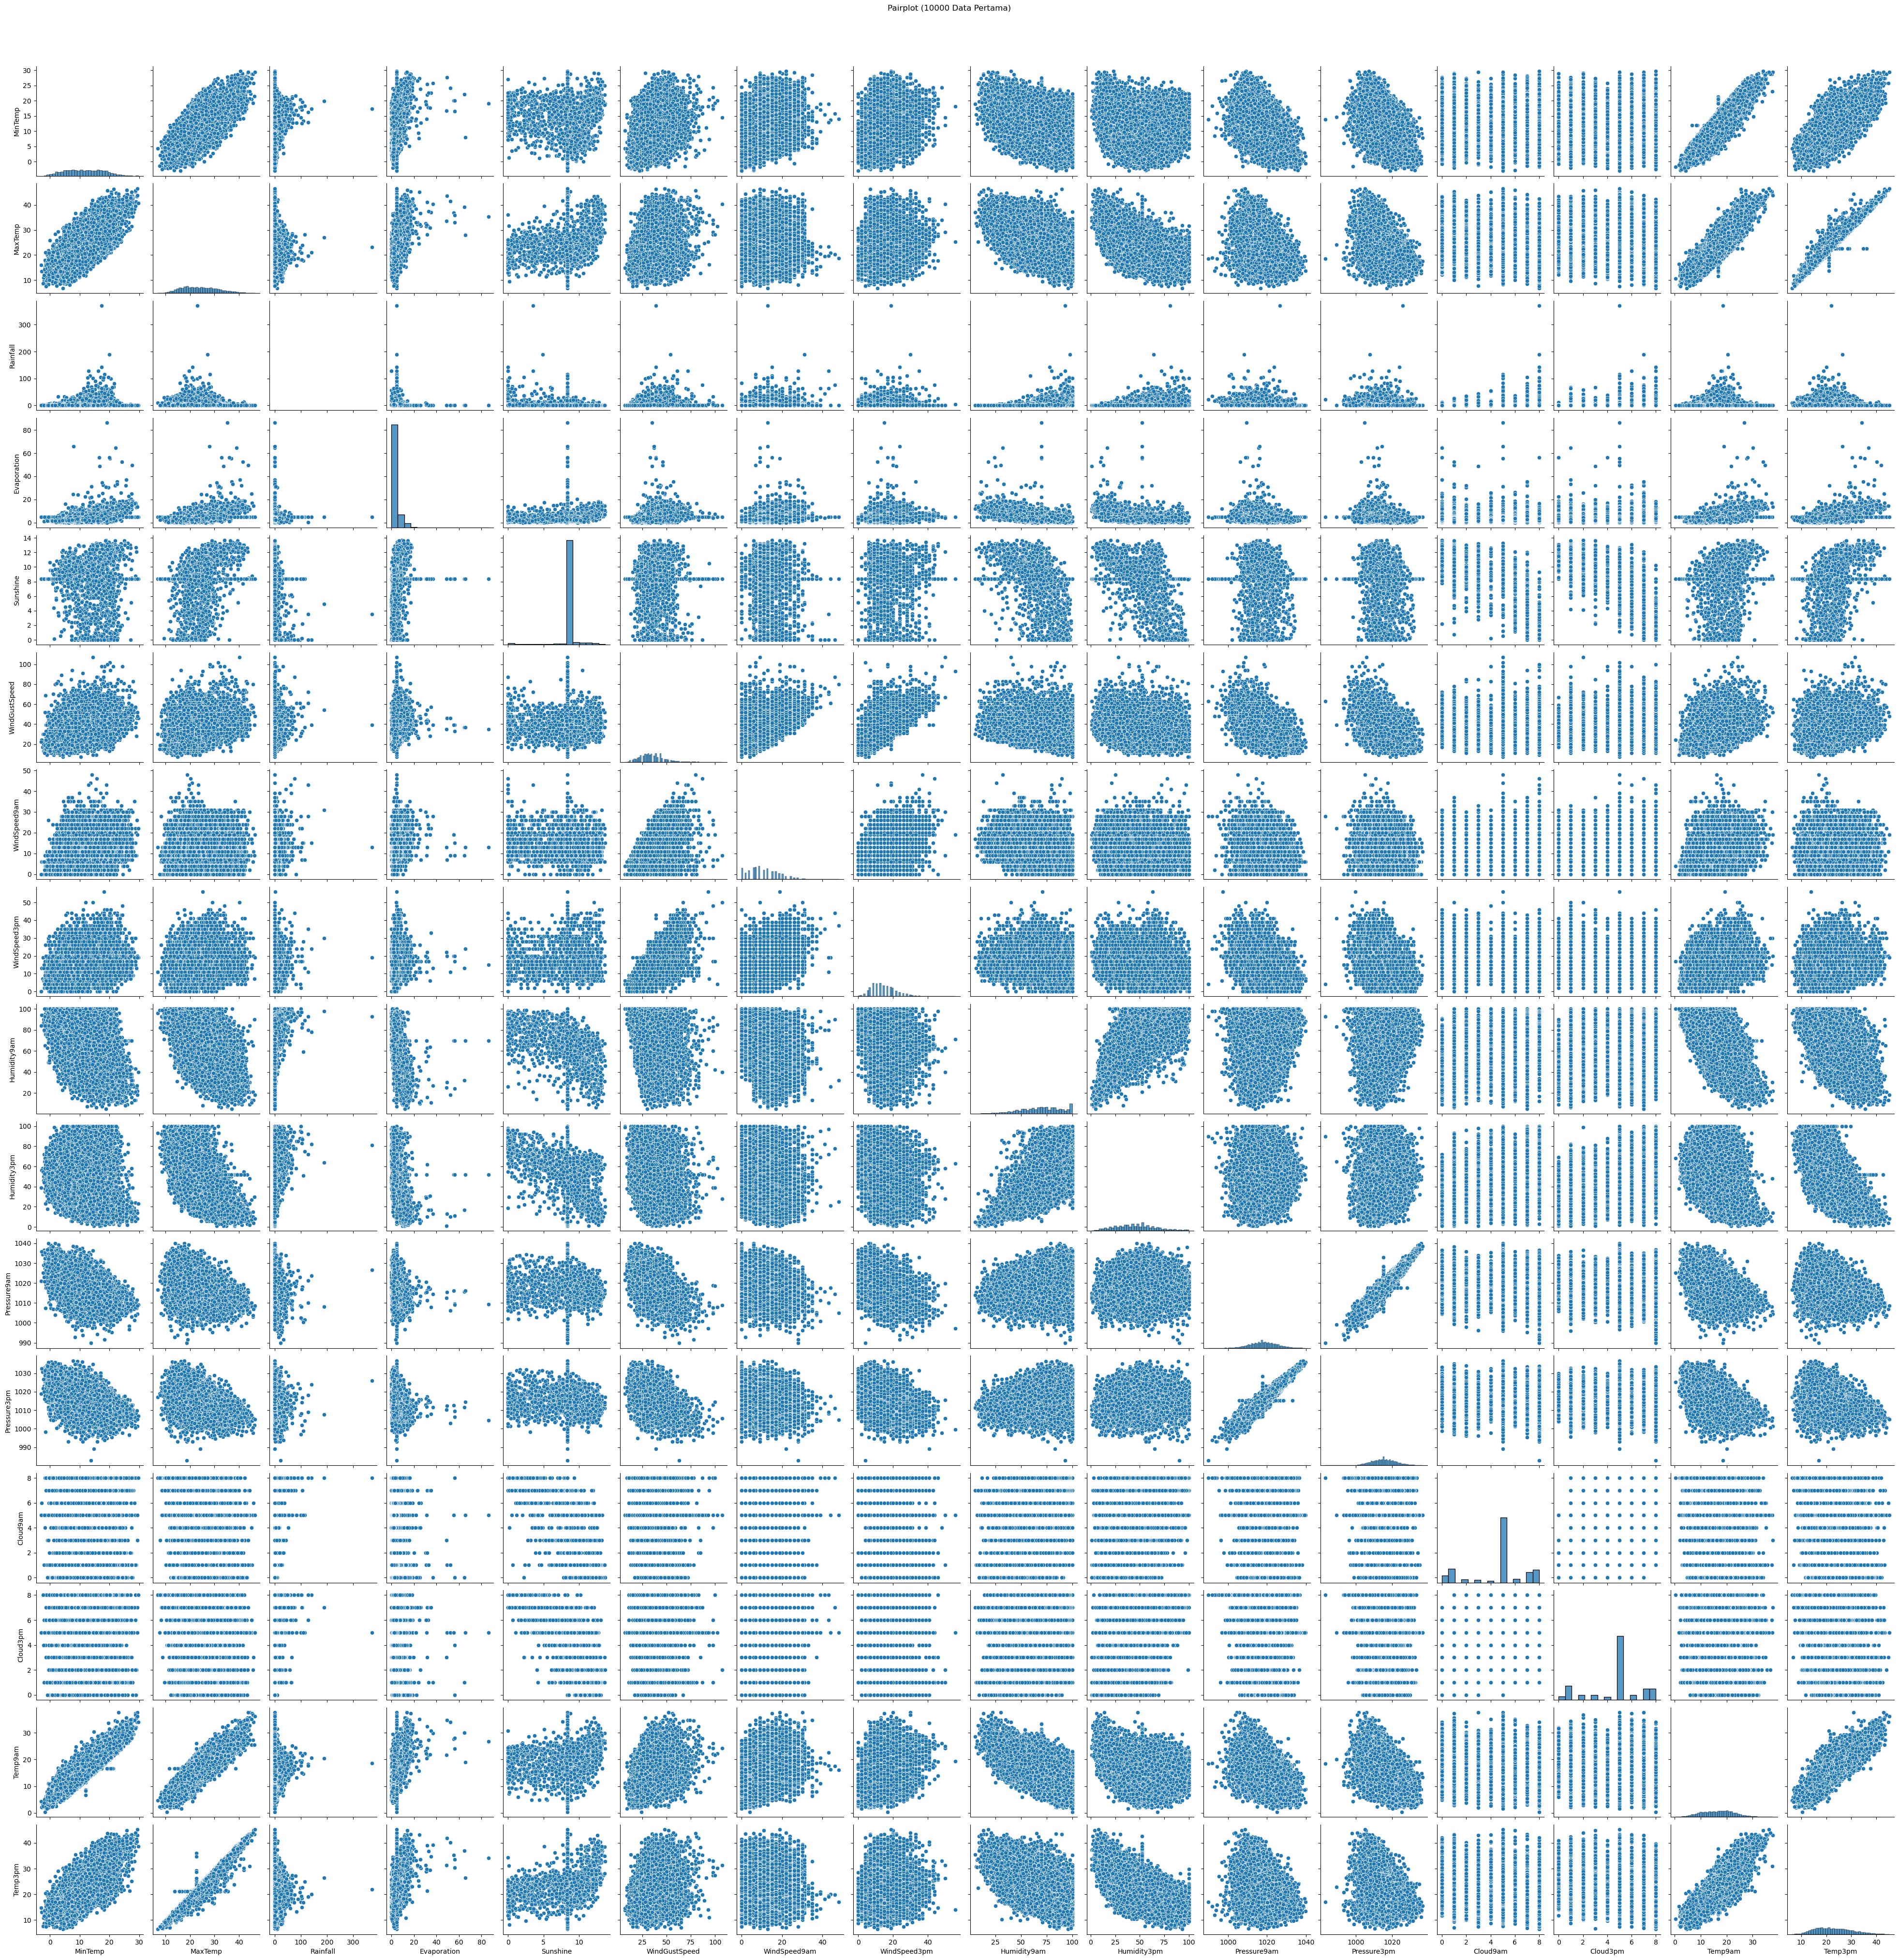

In [47]:
sns.pairplot(df_numerical[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']])
plt.suptitle("Pairplot (10000 Data Pertama)", y=1.02)
plt.show()

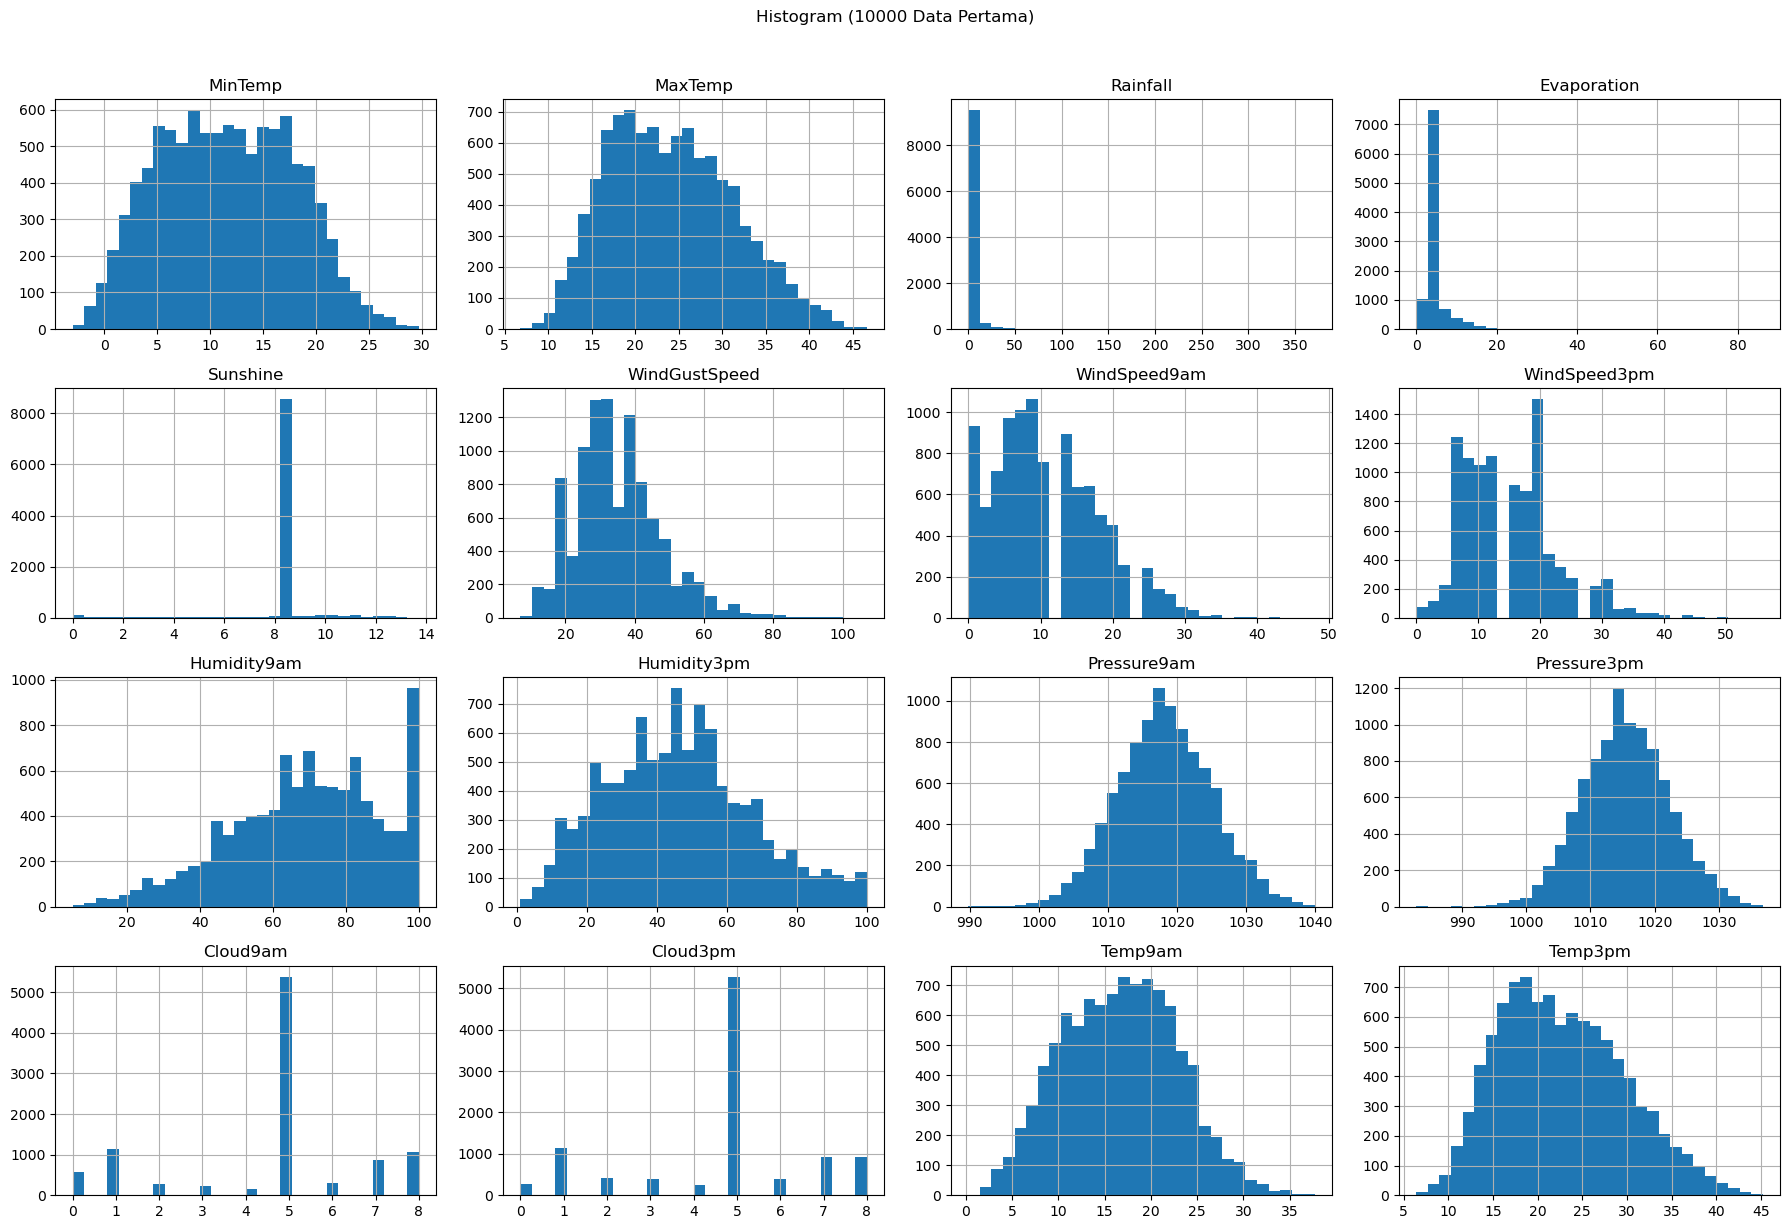

In [48]:
df_numerical.hist(figsize=(18, 12), bins=30)
plt.suptitle("Histogram (10000 Data Pertama)", y=1.02)
plt.tight_layout()
plt.show()

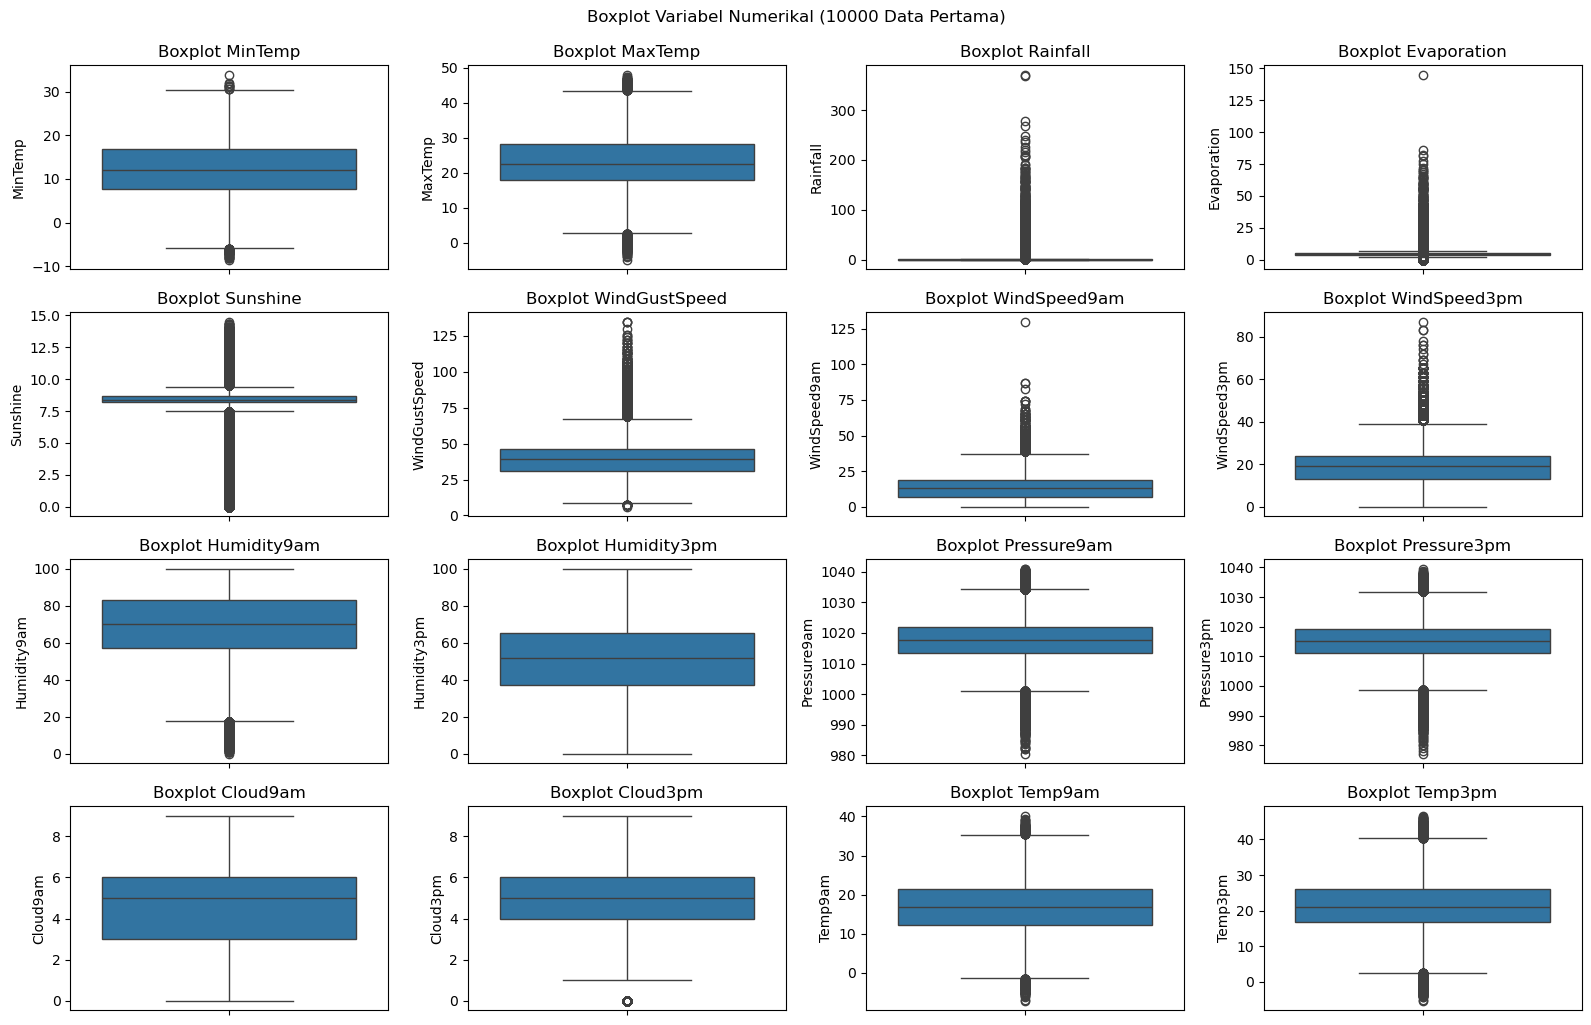

In [63]:
plt.figure(figsize=(16, 10))
for i, var in enumerate(df_numerical): 
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[var])
    plt.title(f'Boxplot {var}')
plt.tight_layout()
plt.suptitle("Boxplot Variabel Numerikal (10000 Data Pertama)", y=1.02)
plt.show()


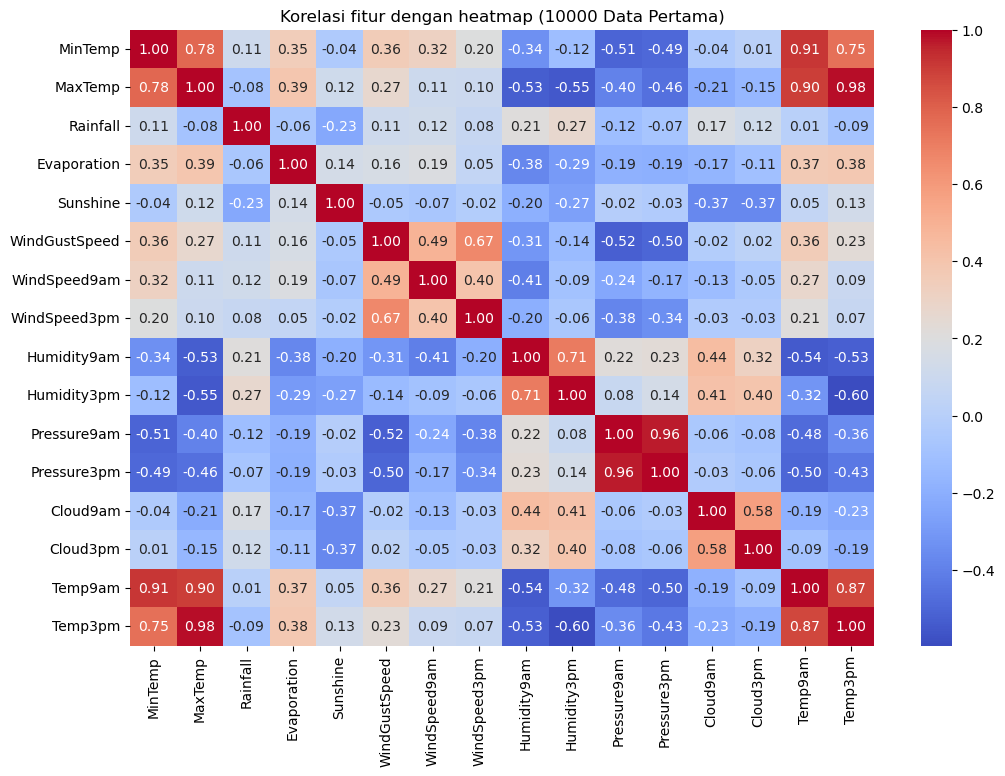

In [49]:
# 3. Heatmap of correlation between numerical variables
plt.figure(figsize=(12, 8))
correlation = df_numerical.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi fitur dengan heatmap (10000 Data Pertama)')
plt.show()

**7.2. Menampilkan atau visualisasi data numerikal**
- Menampilkan data dengan `countplot`, yang bertujuan untuk melihat korelasi, hubungan, dan perbandingan pada visualisasi dataset.

C:\Users\ACER\AppData\Local\Temp\ipykernel_15952\360852231.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RainToday', data=df_kategori, palette='Set2')


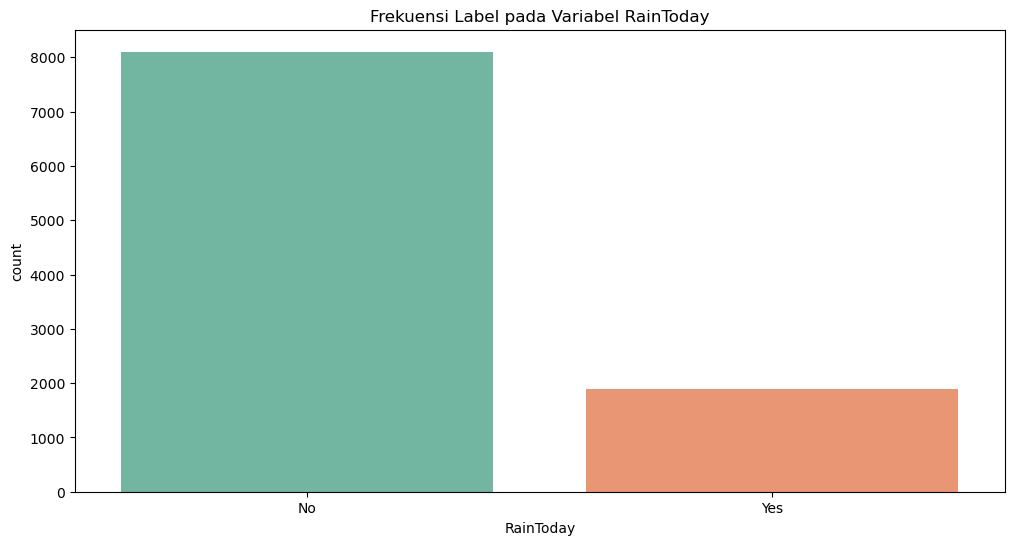

C:\Users\ACER\AppData\Local\Temp\ipykernel_15952\360852231.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RainTomorrow', data=df_kategori, palette='Set2')


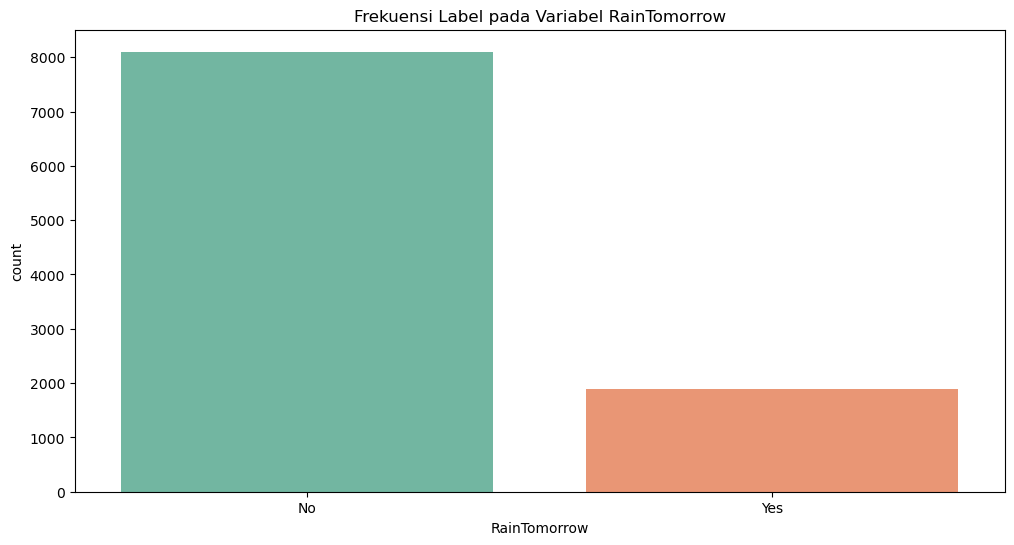

In [67]:
plt.figure(figsize=(12, 6))
sns.countplot(x='RainToday', data=df_kategori, palette='Set2')
plt.title('Frekuensi Label pada Variabel RainToday')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='RainTomorrow', data=df_kategori, palette='Set2')
plt.title('Frekuensi Label pada Variabel RainTomorrow')
plt.show()

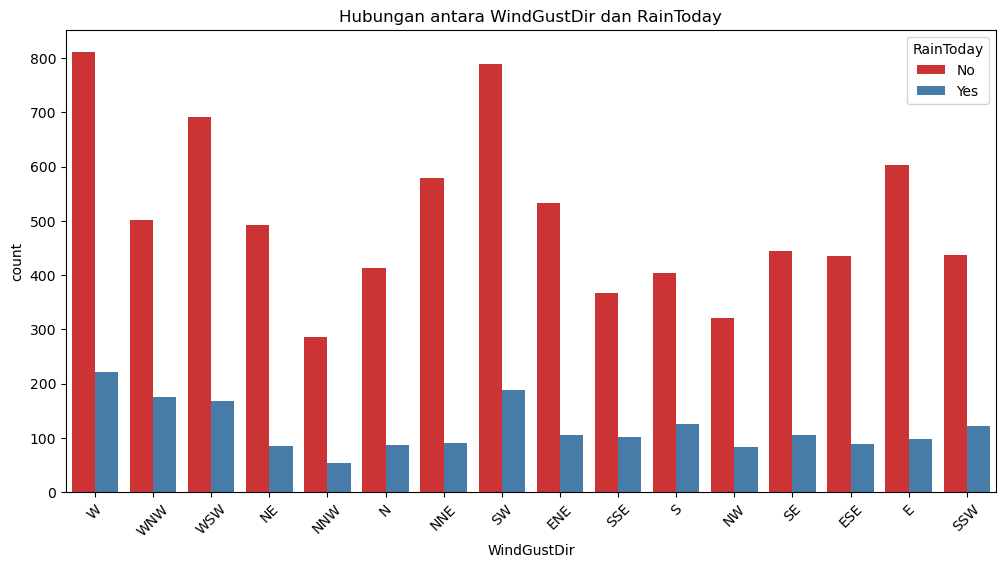

In [69]:
plt.figure(figsize=(12, 6))
sns.countplot(x='WindGustDir', hue='RainToday', data=df_kategori, palette='Set1')
plt.title('Hubungan antara WindGustDir dan RainToday')
plt.xticks(rotation=45)
plt.show()

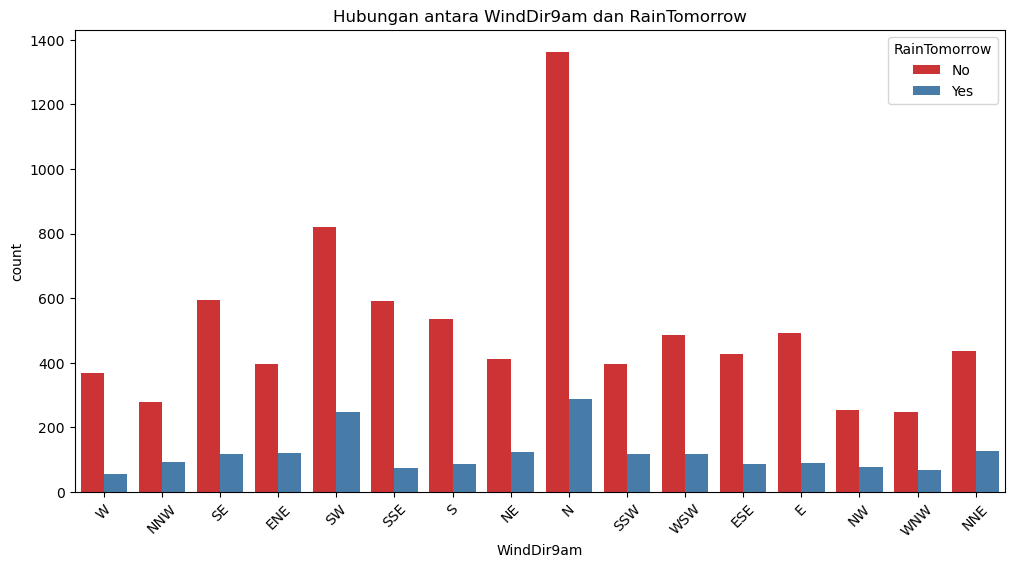

In [70]:
plt.figure(figsize=(12, 6))
sns.countplot(x='WindDir9am', hue='RainTomorrow', data=df_kategori, palette='Set1')
plt.title('Hubungan antara WindDir9am dan RainTomorrow')
plt.xticks(rotation=45)
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_15952\2933738154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Location', data=df_kategori, palette='Set2')


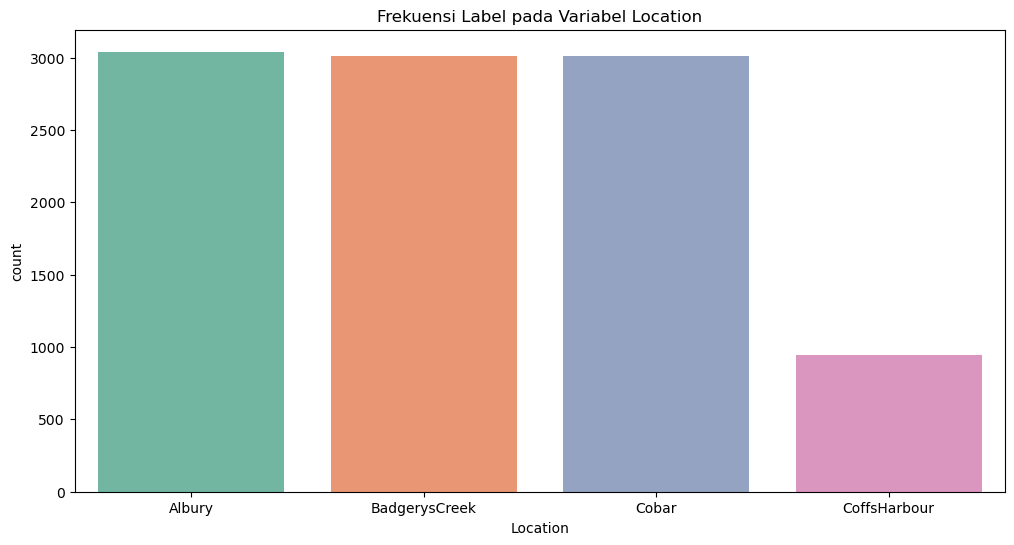

In [71]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', data=df_kategori, palette='Set2')
plt.title('Frekuensi Label pada Variabel Location')
plt.show()

**8. Pada variabel WindSpeed3pm, ada berapa nilai yang tergolong outlier?**, menghitung jumlah `outlier` pada variabel `WindSpeed3pm` dengan menggunakan metode `Interquartile Range (IQR)`, menentukan batas bawah dan atas, lalu menyaring data yang berada di luar rentang tersebut, menghasilkan 115 `outlier` untuk analisis lebih lanjut terhadap distribusi kecepatan angin pada pukul 3 sore.
 

In [77]:
Q1 = df_numerical['WindSpeed3pm'].quantile(0.25)
Q3 = df_numerical['WindSpeed3pm'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_numerical[(df_numerical['WindSpeed3pm'] < lower_bound) | (df_numerical['WindSpeed3pm'] > upper_bound)]

jumlah_outlier = outliers.shape[0]
print(f"Jumlah outlier pada variebl WindSpeed3pm: {jumlah_outlier}")

Jumlah outlier pada variebl WindSpeed3pm: 115


**9. Apa yang dimaksud proses encode? Berikan contoh hasilnya.**, mengonversi variabel kategorikal dalam dataset `df_kategori` menjadi format numerik menggunakan `LabelEncoder`, memungkinkan pemrosesan lebih lanjut dalam analisis data atau penerapan model machine learning dengan merepresentasikan kategori sebagai angka.

In [80]:
df_encoded = df_kategori.copy()

encoder = LabelEncoder()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object' and col != 'Date':
        df_encoded[col] = encoder.fit_transform(df_encoded[col])

df_encoded

Date  Location  WindGustDir  WindDir9am  WindDir3pm  RainToday  \
0     2008-12-01         0           13          13          14          0   
1     2008-12-02         0           14           6          15          0   
2     2008-12-03         0           15          13          15          0   
3     2008-12-04         0            4           9           0          0   
4     2008-12-05         0           13           1           7          0   
...          ...       ...          ...         ...         ...        ...   
9995  2011-08-26         3            0           5           1          0   
9996  2011-08-27         3            1           4           4          0   
9997  2011-08-28         3           11          12          10          1   
9998  2011-08-29         3           12           9           5          0   
9999  2011-08-30         3            8           7          15          1   

      RainTomorrow  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
9995             0  
9996             1  
9997             0  
9998             1  
9999             1  

[10000 rows x 7 columns]

**10. Variable apa yang berhasil diprediksi dan bagaimana hasil prediksinya?**, `LogistikRegression` untuk memprediksi apakah akan hujan besok berdasarkan data arah angin dan kondisi hujan sebelumnya, mencapai akurasi 81,1%, tetapi menunjukkan kesulitan dalam memprediksi hujan dengan recall hanya 13% untuk kelas positif.

In [ ]:
X = df_encoded[['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']]  
y = df_encoded['RainTomorrow']  

X = X.fillna(X.mean())  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Model: ", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi Model:  0.811

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      1607
           1       0.58      0.13      0.22       393

    accuracy                           0.81      2000
   macro avg       0.70      0.55      0.55      2000
weighted avg       0.77      0.81      0.76      2000



In [105]:
def prediksi_hujan(input_data):  
    prediksi = model.predict([input_data])
    
    if prediksi == 1:
        return "Besok hujan"
    else:
        return "Besok tidak hujan"

input_data = [14, 15, 12, 1] 

hasil_prediksi = prediksi_hujan(input_data)
print(hasil_prediksi)

Besok tidak hujan


e:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
